# Ejemplo 02
## Jaffet León Chávez

El reto consta de que generes una red neuronal con solo 3 variables:

### 1- Número de embarazos
#### 2- Concentración de glucosa en la plasma sanguínea a 2 horas en una prueba oral
#### 3- Presión sanguínea diastólica (mm Hg)

Su reto es:
- Generar una red neuronal con 2 layers de neuronas que generen una dendrita de salida binaria para clasificar los nuevos casos observados como 1 (diabético) o 0 (no diabético).
- Probar su modelo con al menos 5 observaciones del data set que usted ya tiene

Recuerde que la última variable es la dummy

In [74]:
# Librerías a usar

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Input
import pandas as pd
import matplotlib as mp
import seaborn as sns

# Paso 1
Carga los datos. Use pandas para ello

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2006.%20Redes%20Neuronales_/Reto%2002/diabeticosReto.csv", header=0)
missingCol = df.columns
df = df.append(pd.Series(missingCol, index=missingCol), ignore_index=True)
cols = ["Embarazos", "Glucosa", "Presion", "Diabetes"]
df.columns = cols
df.tail()

,Embarazos,Glucosa,Presion,Diabetes
763,2,122,70,0
764,5,121,72,0
765,1,126,60,1
766,1,93,70,0
767,6,148,72,1


In [59]:
df["Diabetes"] = df["Diabetes"].replace('1', 1)
df.dtypes
df = df.astype({"Embarazos": 'int32', "Glucosa": 'int32', "Presion": 'int32', "Diabetes": "category"})
df.dtypes

Embarazos       int32
Glucosa         int32
Presion         int32
Diabetes     category
dtype: object

In [60]:
df["Diabetes"].unique()

[0, 1]
Categories (2, int64): [0, 1]

# Paso 2
Genere un breve EDA que incluya:
- 3 gráficas de las 3 distintas variables para el reto
- Una exploración de la distirbución de las variables, o que ayude a comprender las dimensiones de las 3 variables que está usted por usar para generar su red neuronal

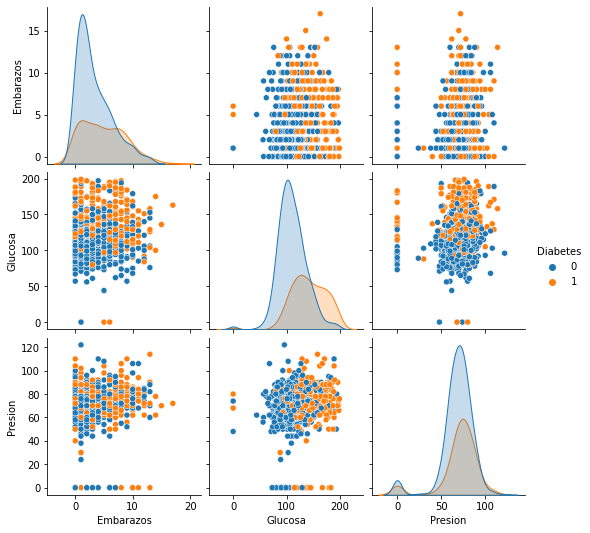

In [61]:
#9- Variable dummy. haga print de ella
sns.pairplot(df, hue="Diabetes");

# (X) serán las variables explicativas y (y) la dicótomica, pero solo usaremos:
###  1- Número de embarazos
#### 2- Concentración de glucosa en la plasma sanguínea a 2 horas en una prueba oral
#### 3- Presión sanguínea diastólica (mm Hg)

# Defina aquí debajo sus variables de entrenamiento


In [68]:
x = df.loc[:, ["Embarazos", "Glucosa", "Presion"]]
y = df["Diabetes"]

In [70]:
print(x.shape)
print(y.shape)

(768, 3)
(768,)


# Paso 3
Defina al red neuronal con la ayuda de Keras. Recuerde, intento y error.

In [105]:
inp_neurons = x.shape[1]

DNN = Sequential()

# Define layers
DNN.add(Input(shape=(inp_neurons,)))
DNN.add(Dense(15, activation="relu"))
DNN.add(Dense(5, activation="relu"))
DNN.add(Dense(15, activation="relu"))
DNN.add(Dense(1, activation="sigmoid")) # binary output

DNN.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) # compile model

DNN.fit(x, y, epochs=30, batch_size=15) # train model

Epoch 1/30
52/52 [==============================] - 1s 2ms/step - loss: 1.7808 - accuracy: 0.4477
Epoch 2/30
52/52 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.6113
Epoch 3/30
52/52 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6838
Epoch 4/30
52/52 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6248
Epoch 5/30
52/52 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6893
Epoch 6/30
52/52 [==============================] - 0s 1ms/step - loss: 0.6169 - accuracy: 0.6874
Epoch 7/30
52/52 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.6845
Epoch 8/30
52/52 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.7056
Epoch 9/30
52/52 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6781
Epoch 10/30
52/52 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7004
Epoch 11/30
52/52 [

In [106]:
_, acc = DNN.evaluate(x, y)

24/24 [==============================] - 0s 1ms/step - loss: 0.5638 - accuracy: 0.7148


In [121]:
def checkAccuracy(x, y, model):
  preds = np.argmax(model.predict(x), axis=-1)
  for i in range(len(x)):
    if preds[i] != y.iloc[i]:
      print(f"Failed in case with: {x.iloc[i].values}. Correct answer: {y.iloc[i]}. Prediction: {preds[i]}")

In [122]:
checkAccuracy(x, y, DNN)

Failed in case with: [  8 183  64]. Correct answer: 1. Prediction: 0
Failed in case with: [  0 137  40]. Correct answer: 1. Prediction: 0
Failed in case with: [ 3 78 50]. Correct answer: 1. Prediction: 0
Failed in case with: [  2 197  70]. Correct answer: 1. Prediction: 0
Failed in case with: [  8 125  96]. Correct answer: 1. Prediction: 0
Failed in case with: [ 10 168  74]. Correct answer: 1. Prediction: 0
Failed in case with: [  1 189  60]. Correct answer: 1. Prediction: 0
Failed in case with: [  5 166  72]. Correct answer: 1. Prediction: 0
Failed in case with: [  7 100   0]. Correct answer: 1. Prediction: 0
Failed in case with: [  0 118  84]. Correct answer: 1. Prediction: 0
Failed in case with: [  7 107  74]. Correct answer: 1. Prediction: 0
Failed in case with: [  1 115  70]. Correct answer: 1. Prediction: 0
Failed in case with: [  7 196  90]. Correct answer: 1. Prediction: 0
Failed in case with: [  9 119  80]. Correct answer: 1. Prediction: 0
Failed in case with: [ 11 143  94]. C

In [94]:
import numpy as np

DNN.predict(np.array([1, 100, 100]).reshape(1, -1))

array([[0.09277025]], dtype=float32)

# Paso 5
Evalue la la precisión del modelo

# Paso 6
Junte todos los pedazos de código y corra el script.

# Vamos a Proyectar